In [1]:
import my_modules.monte_carlo as mc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

C:\Users\jdivers\PycharmProjects\df_image_analysis\.venv\Lib\site-packages\cupy\_environment.py:217: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [2]:
dw = mc.OpticalMedium(n=1.33, mu_a=0, mu_s=0, g=0, type='water', display_color='aqua')
g = mc.OpticalMedium(n=1.523, mu_a=0, mu_s=0, g=0,type= 'glass', display_color='gray')
t = mc.OpticalMedium(n=1.33, mu_a=5, mu_s=100, g=0.85, type='tissue', display_color='lightpink')
surroundings_n = 1.33

OD = 0.3205672345588178
ID = 0.27206723455881785
theta = np.arctan(-OD / 0.2)

sampler = mc.monte_carlo.ring_pattern((ID, OD), theta)
LED = mc.Illumination(pattern=sampler)
detector = mc.Detector(mc.monte_carlo.cone_of_acceptance(ID))

n = 500

# Simulation comparisons
| ID | System               | Tissue thickness | Simulation method | Recursion | Illumination direction | Illumination Incidence | Detector   | Comparison | Notes                                        |
|:---|:---------------------|:-----------------|:------------------|:----------|:-----------------------|:-----------------------|:-----------|:-----------|:---------------------------------------------|
| 1  | Tissue               | Inf              | Manual Method     | False     | Normal                 | Origin                 | None       | A          |                                              |
| 2  | Tissue               | Inf              | Photon Method     | False     | Normal                 | Origin                 | None       | AB         |                                              |
| 3  | Tissue               | Inf              | Photon Method     | Simple    | Normal                 | Origin                 | None       | BC         |                                              |
| 4  | Tissue               | Inf              | Photon Method     | Simple    | Oblique                | Origin                 | None       | CD         | Compared direciton sampling in sub-a and -b  |
| 5  | Tissue               | Inf              | Photon Method     | Simple    | Oblique                | Ring                   | None       | DE         | Compared location sampline in sub-a and -b   |
| 6  | Tissue               | Inf              | Photon Method     | Simple    | Oblique                | Ring                   | Inner cone | EF         | Compare detection accounting in sub-a and -b |
| 7  | Water, Tissue        | Inf              | Photon Method     | Simple    | Oblique                | Ring                   | Inner cone | FG         |                                              |
| 8  | Water, Glass, Tissue | Inf              | Photon Method     | Simple    | Oblique                | Ring                   | Inner cone | GH         |                                              |
| 9  | Water, Glass, Tissue | 1mm              | Photon Method     | Simple    | Oblique                | Ring                   | Inner cone | GH         |                                              |


## Simulation 1

In [3]:
s = mc.System(
    t, float('inf'),
    surrounding_n=surroundings_n,
    illuminator=LED,
    detector=(detector, 0),
)

0 total internal reflectance events.
0.00% of photons transmitted. 
24.68% of photons reflected 
75.23% of photons absorbed 
500 total photons simulated.
0.09% overage of photons.


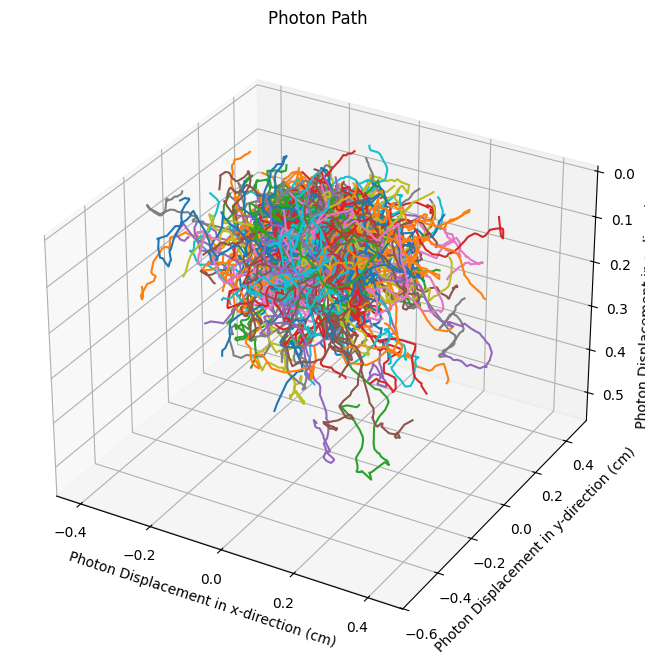

In [4]:
T, R, A = 3 * [0]
tir = 0
ax = None
for i in range(n):
    photon = mc.Photon(650, system=s, recurse=False, russian_roulette_constant=20)
    while not photon.is_terminated:
        photon.absorb()
        photon.move()
        photon.scatter()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    _, ax = photon.plot_path(axes=ax)
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

## Simulation 2

In [5]:
photon.system.interface_crossed([ 0.05798301, -0.00700593,  0.00266555], [ 0.06920195, -0.00800436, -0.00503588])

((Tissue Optical Medium Object, Surroundings Optical Medium Object),
 np.float64(0.0))

0 total internal reflectance events.
0.00% of photons transmitted. 
24.47% of photons reflected 
75.54% of photons absorbed 
500 total photons simulated.
-0.02% overage of photons.


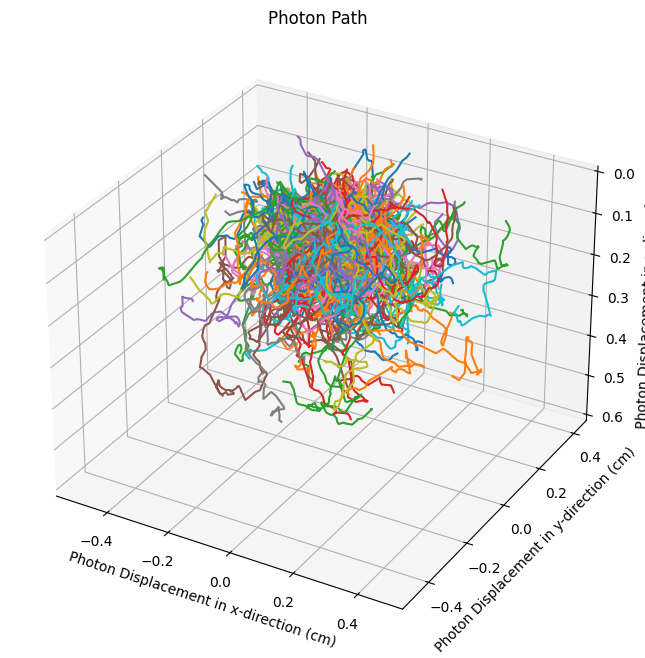

In [6]:
T, R, A = 3 * [0]
tir = 0
ax = None
for i in range(n):
    photon = mc.Photon(650, system=s, recurse=False, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    _, ax = photon.plot_path(axes=ax)
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

## Simulation 3

0 total internal reflectance events.
0.00% of photons transmitted. 
25.56% of photons reflected 
74.45% of photons absorbed 
500 total photons simulated.
-0.02% overage of photons.


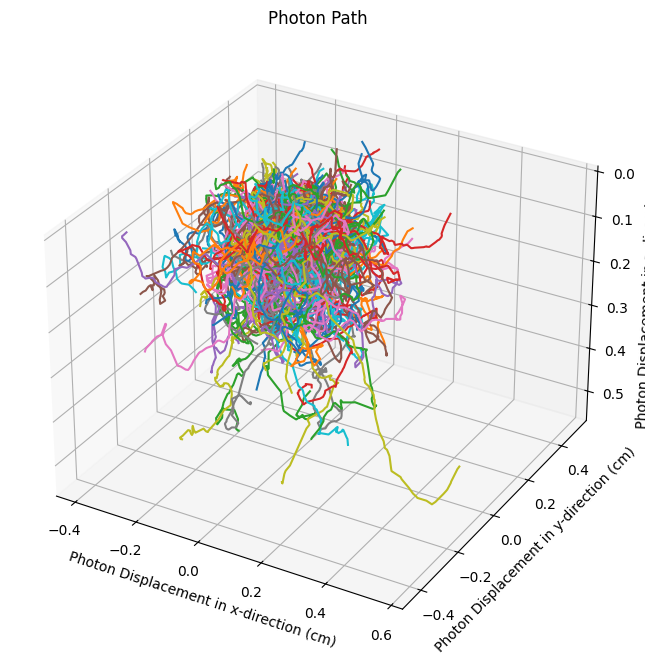

In [7]:
T, R, A = 3 * [0]
tir = 0
ax = None
for i in range(n):
    photon = mc.Photon(650, system=s, recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    _, ax = photon.plot_path(axes=ax)
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

## Simulation 4
### 4a

0 total internal reflectance events.
0.00% of photons transmitted. 
36.12% of photons reflected 
63.89% of photons absorbed 
500 total photons simulated.
-0.02% overage of photons.


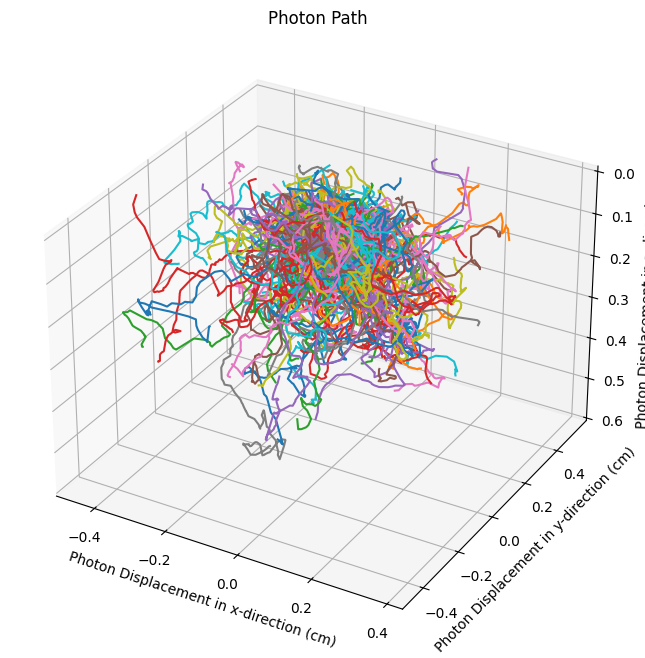

In [8]:
phi = 2 * np.pi * np.random.rand()
dir_cos = np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])
T, R, A = 3 * [0]
tir = 0
ax = None
for i in range(n):
    photon = mc.Photon(650, directional_cosines=dir_cos, system=s, recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    _, ax = photon.plot_path(axes=ax)
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

### 4b

0 total internal reflectance events.
0.00% of photons transmitted. 
40.81% of photons reflected 
59.18% of photons absorbed 
500 total photons simulated.
0.01% overage of photons.


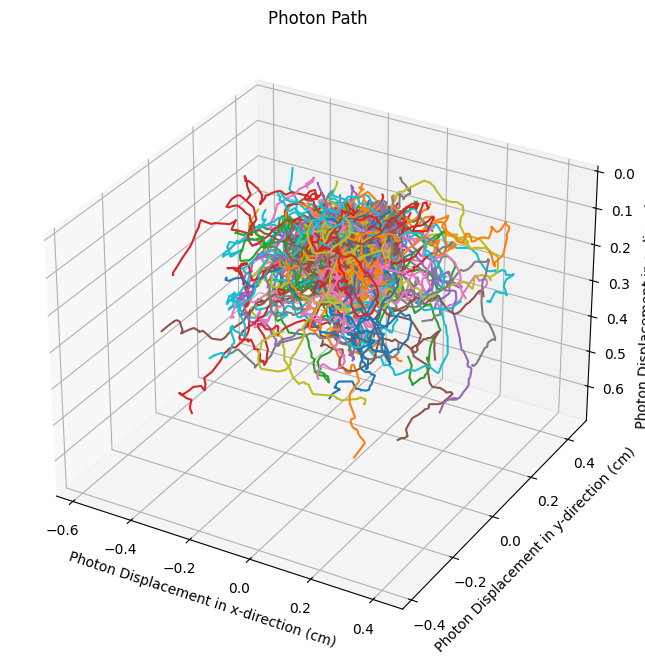

In [9]:
tir = 0
T, R, A = 3 * [0]
ax = None
for i in range(n):
    _, direction = sampler()
    photon = mc.Photon(650, directional_cosines=direction, system=s, recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    _, ax = photon.plot_path(axes=ax)
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

## Simulation 5
### 5a

0 total internal reflectance events.
0.00% of photons transmitted. 
39.51% of photons reflected 
60.49% of photons absorbed 
500 total photons simulated.
0.00% overage of photons.


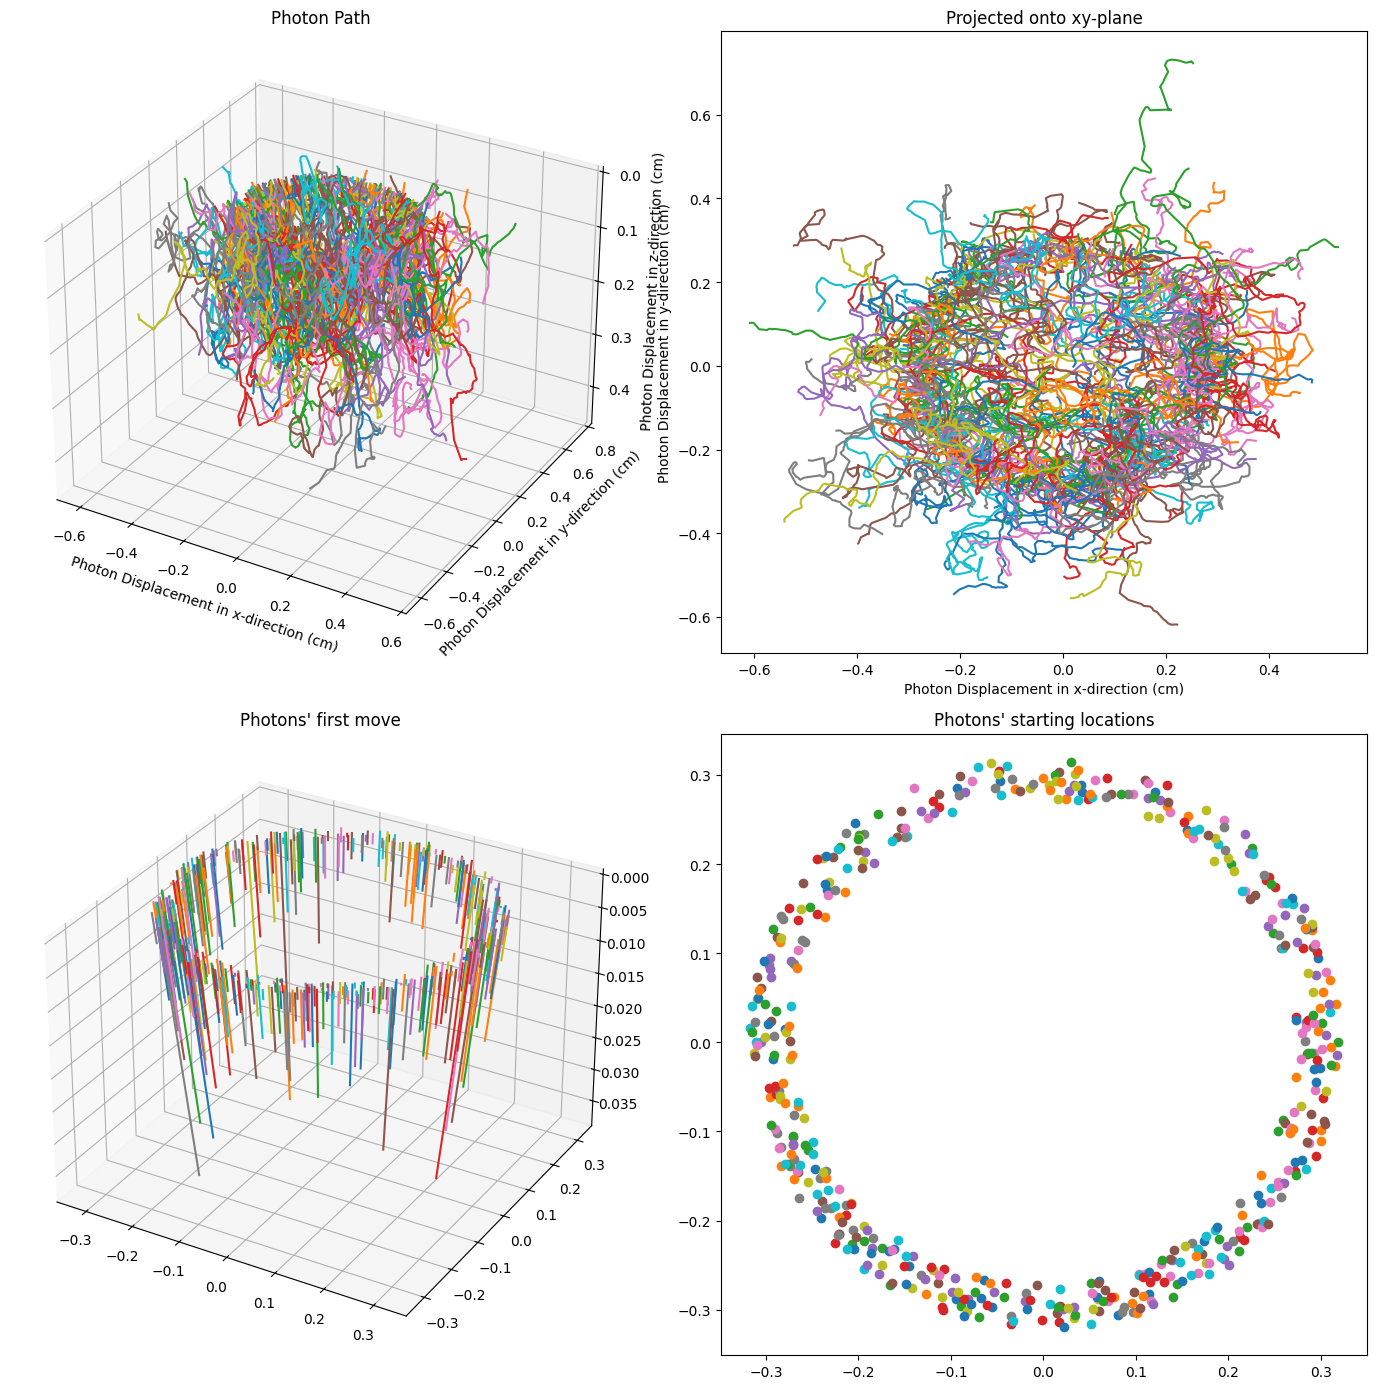

In [10]:
tir = 0
T, R, A = 3 * [0]
fig = plt.figure(figsize=(14, 14))
ax = np.array([
    fig.add_subplot(2, 2, 1, projection='3d'), fig.add_subplot(2, 2, 2), 
    fig.add_subplot(2, 2, 3, projection='3d'), fig.add_subplot(2, 2, 4)
])
for i in range(n):
    location, direction = sampler()
    photon = mc.Photon(650, location_coordinates=location, directional_cosines=direction, system=s, recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    photon.plot_path(axes=ax[0])
    photon.plot_path(project_onto='xy', axes=[ax[1]])
    x,y,z = zip(photon.location_history[0], photon.location_history[1])
    ax[2].plot(x, y, z)
    ax[3].scatter(*photon.location_history[0][:2])
ax[2].set_title("Photons' first move")
ax[2].invert_zaxis()
ax[3].set_title("Photons' starting locations")
fig.tight_layout()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

### 5b

0 total internal reflectance events.
0.00% of photons transmitted. 
38.37% of photons reflected 
61.64% of photons absorbed 
500 total photons simulated.
-0.00% overage of photons.


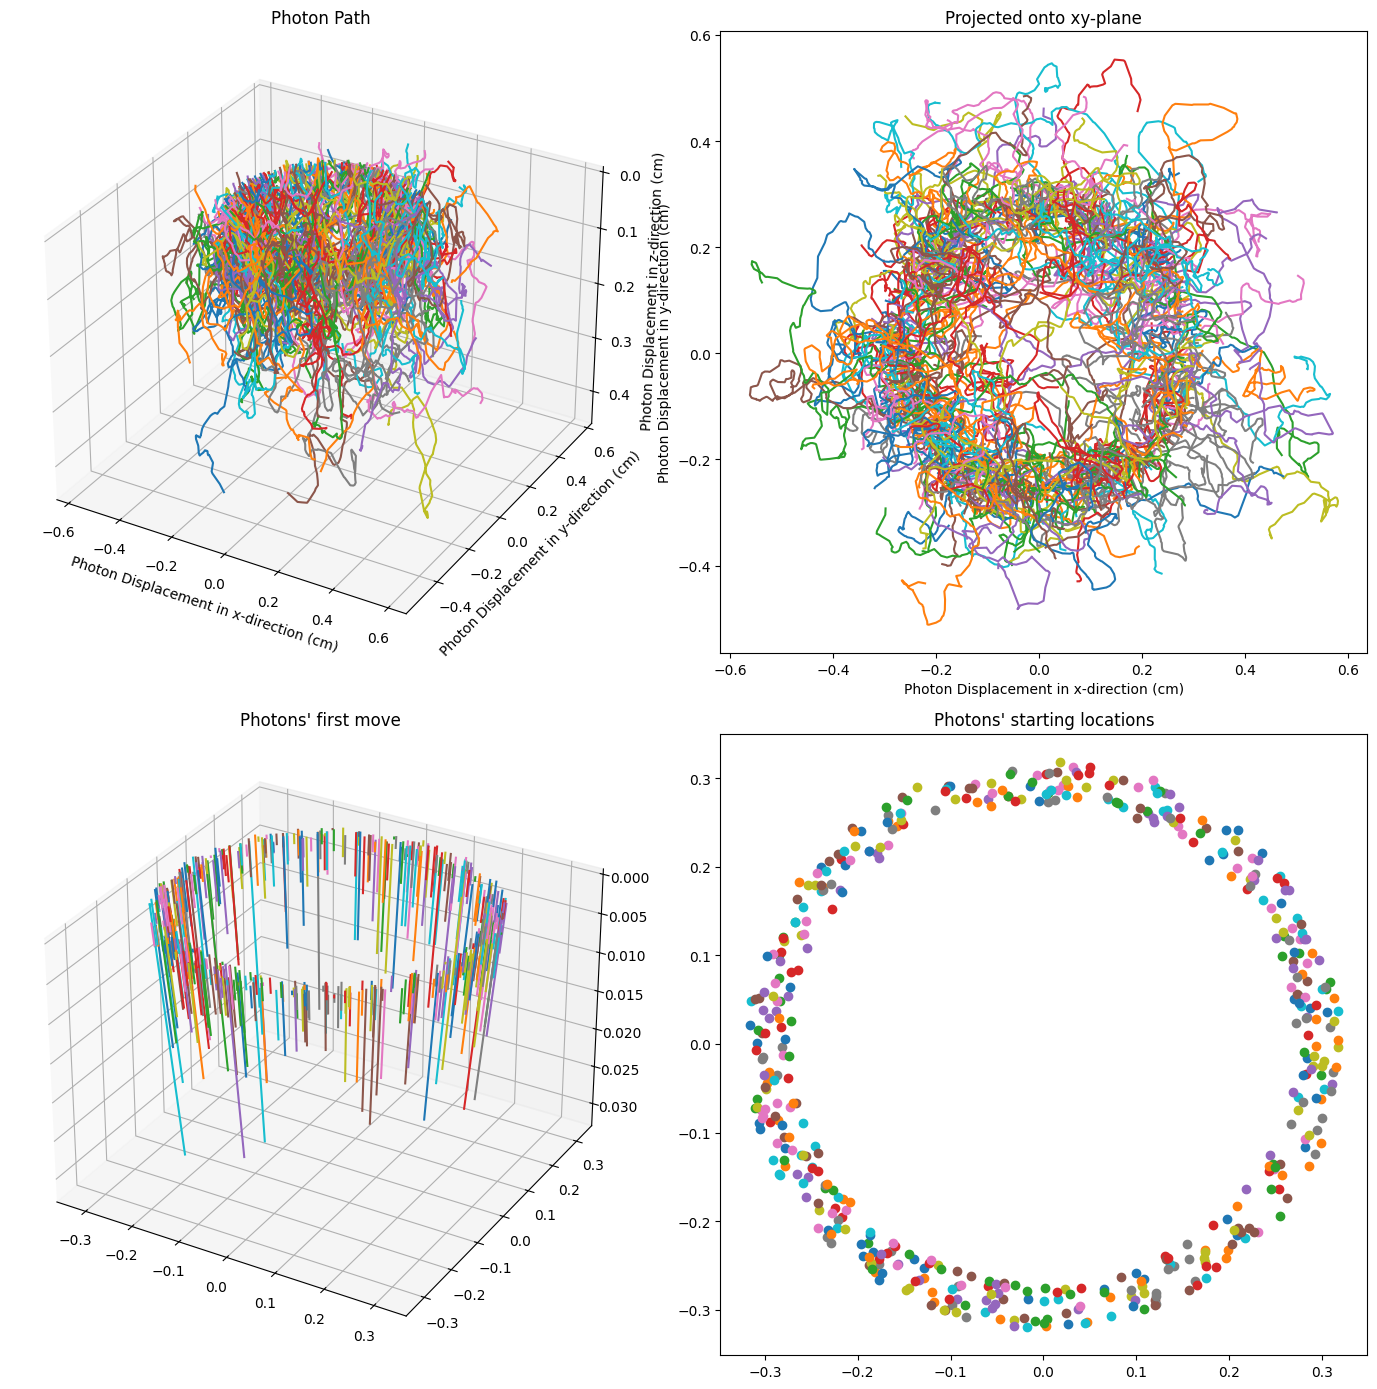

In [11]:
tir = 0
T, R, A = 3 * [0]
fig = plt.figure(figsize=(14, 14))
ax = np.array([
    fig.add_subplot(2, 2, 1, projection='3d'), fig.add_subplot(2, 2, 2), 
    fig.add_subplot(2, 2, 3, projection='3d'), fig.add_subplot(2, 2, 4)
])
for i in range(n):
    photon = s.beam(recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    photon.plot_path(axes=ax[0])
    photon.plot_path(project_onto='xy', axes=[ax[1]])
    x,y,z = zip(photon.location_history[0], photon.location_history[1])
    ax[2].plot(x, y, z)
    ax[3].scatter(*photon.location_history[0][:2])
ax[2].set_title("Photons' first move")
ax[2].invert_zaxis()
ax[3].set_title("Photons' starting locations")
fig.tight_layout()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

## Simulation 6
### 6a

0 total internal reflectance events.
0.00% of photons transmitted. 
40.21% of photons reflected 
59.81% of photons absorbed 
500 total photons simulated.
18.09% of photons detected 
-0.02% overage of photons.


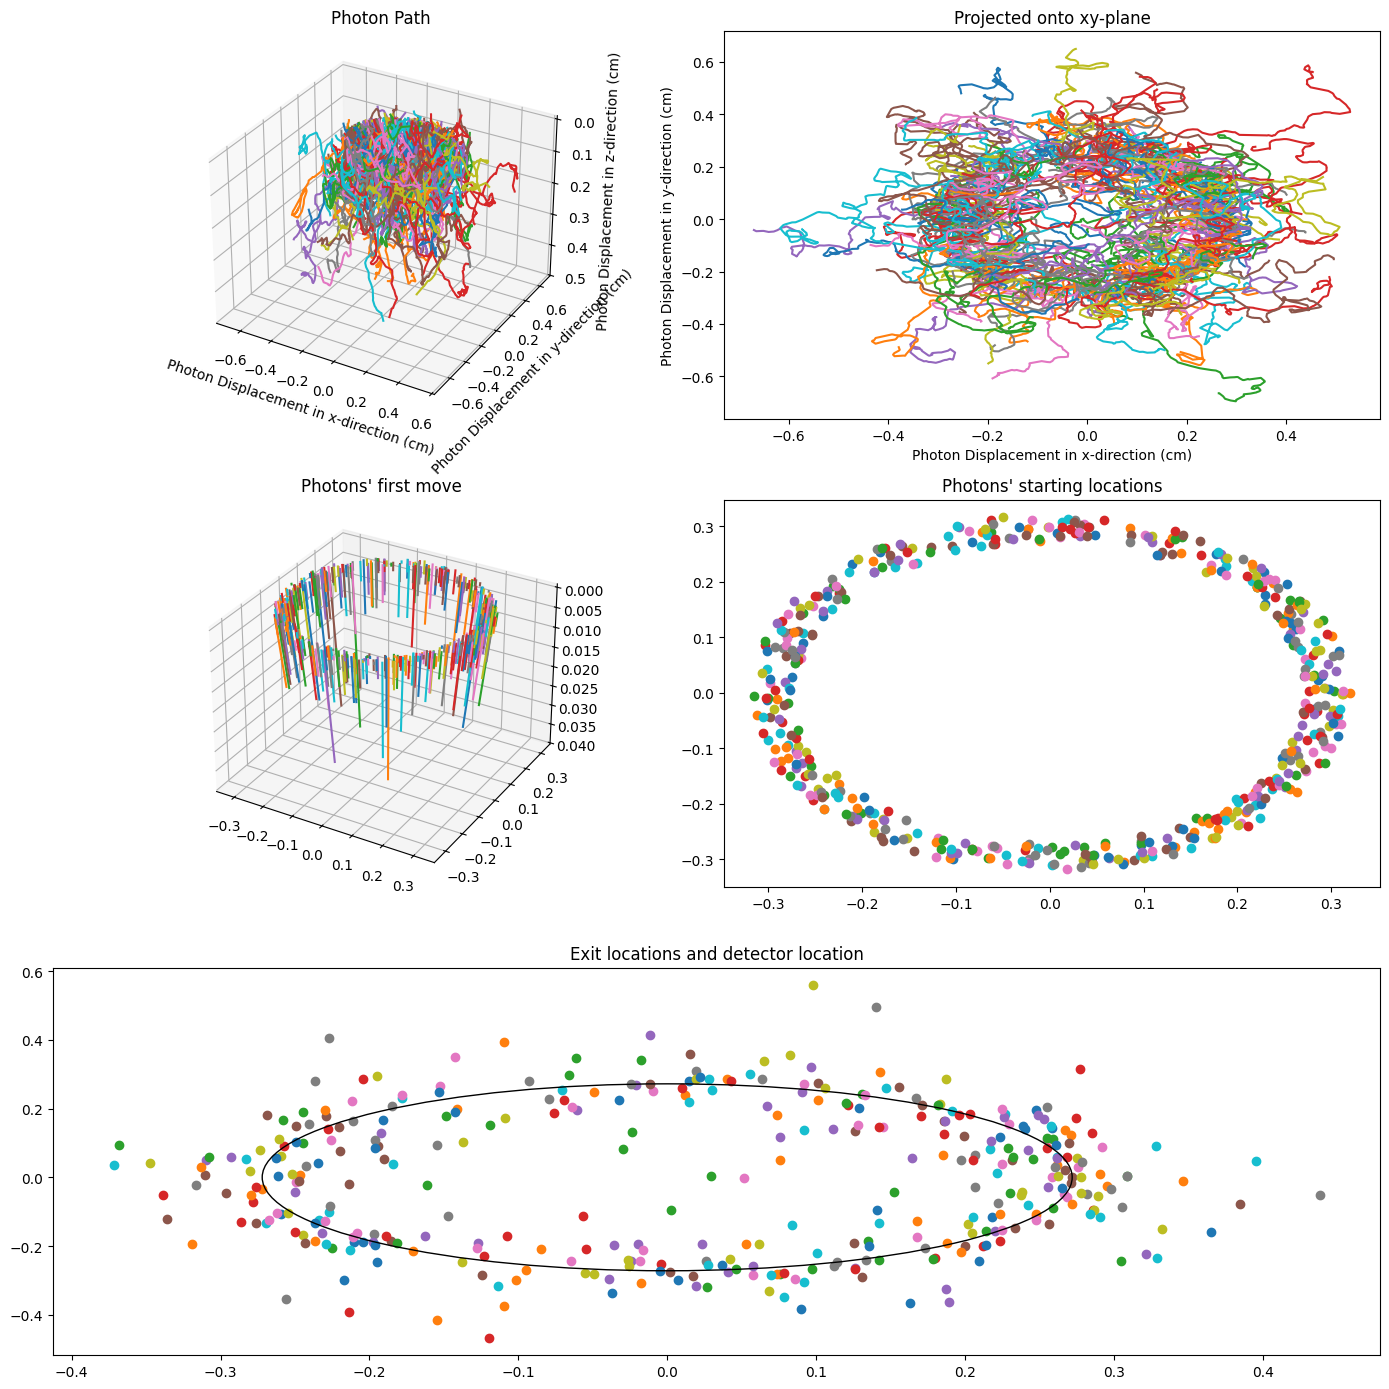

In [12]:
tir = 0
T, R, A = 3 * [0]
detected = 0
fig = plt.figure(figsize=(14, 14))
ax = np.array([
    fig.add_subplot(3, 2, 1, projection='3d'), fig.add_subplot(3, 2, 2), 
    fig.add_subplot(3, 2, 3, projection='3d'), fig.add_subplot(3, 2, 4),
    fig.add_subplot(3, 1, 3)
])
for i in range(n):
    photon = s.beam(recurse=True, russian_roulette_constant=20)
    photon.simulate()
    exit_r = np.sqrt(photon.exit_location[0] ** 2 + photon.exit_location[1] ** 2)  if photon.exit_location is not None else float('inf')
    if exit_r < ID:
        detected += photon.R
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    photon.plot_path(axes=ax[0])
    photon.plot_path(project_onto='xy', axes=[ax[1]])
    x,y,z = zip(photon.location_history[0], photon.location_history[1])
    ax[2].plot(x, y, z)
    ax[3].scatter(*photon.location_history[0][:2])
    if photon.exit_location is not None and photon.exit_location[2] == 0:
        x, y, z = photon.exit_location
        ax[4].scatter(x,y)
ax[2].set_title("Photons' first move")
ax[2].invert_zaxis()
ax[3].set_title("Photons' starting locations")
detector_circle = patches.Circle((0,0), ID, edgecolor='black', facecolor='none')
ax[4].add_patch(detector_circle)
ax[4].set_title('Exit locations and detector location')
fig.tight_layout()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:.2f}".format(detected / n * 100) + '% of photons detected ')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

### 6b

0 total internal reflectance events.
0.00% of photons transmitted. 
36.67% of photons reflected 
63.31% of photons absorbed 
500 total photons simulated.
17.04% of photons detected 
0.02% overage of photons.


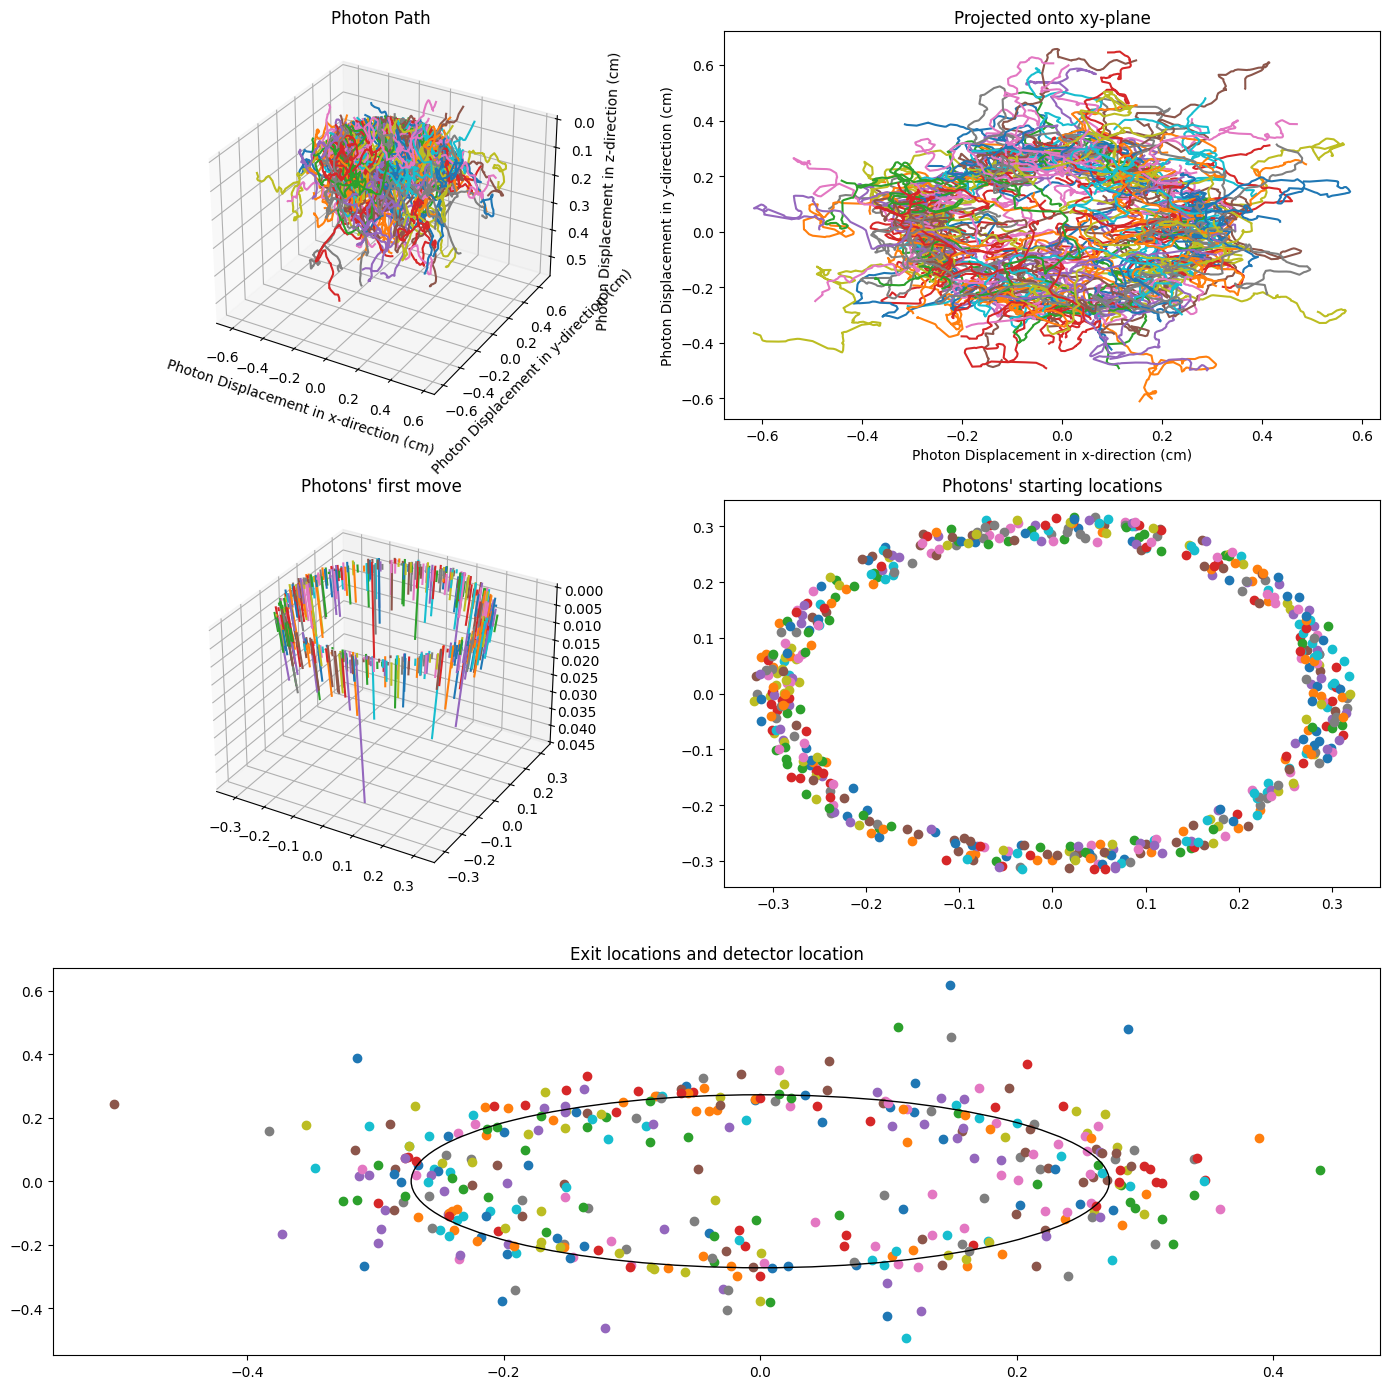

In [13]:
tir = 0
T, R, A = 3 * [0]
detector.reset()
fig = plt.figure(figsize=(14, 14))
ax = np.array([
    fig.add_subplot(3, 2, 1, projection='3d'), fig.add_subplot(3, 2, 2), 
    fig.add_subplot(3, 2, 3, projection='3d'), fig.add_subplot(3, 2, 4),
    fig.add_subplot(3, 1, 3)
])
for i in range(n):
    photon = s.beam(recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    photon.plot_path(axes=ax[0])
    photon.plot_path(project_onto='xy', axes=[ax[1]])
    x,y,z = zip(photon.location_history[0], photon.location_history[1])
    ax[2].plot(x, y, z)
    ax[3].scatter(*photon.location_history[0][:2])
    if photon.exit_location is not None and photon.exit_location[2] == 0:
        x, y, z = photon.exit_location
        ax[4].scatter(x,y)
ax[2].set_title("Photons' first move")
ax[2].invert_zaxis()
ax[3].set_title("Photons' starting locations")
detector_circle = patches.Circle((0,0), ID, edgecolor='black', facecolor='none')
ax[4].add_patch(detector_circle)
ax[4].set_title('Exit locations and detector location')
fig.tight_layout()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:.2f}".format(detector.n_detected / n * 100) + '% of photons detected ')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

## Simulation 7

In [14]:
s = mc.System(
    dw, 0.2,
    t, float('inf'),
    surrounding_n=surroundings_n,
    illuminator=LED,
    detector=(detector,0)
)

0 total internal reflectance events.
0.00% of photons transmitted. 
41.38% of photons reflected 
58.68% of photons absorbed 
500 total photons simulated.
35.56% of photons detected 
-0.06% overage of photons.


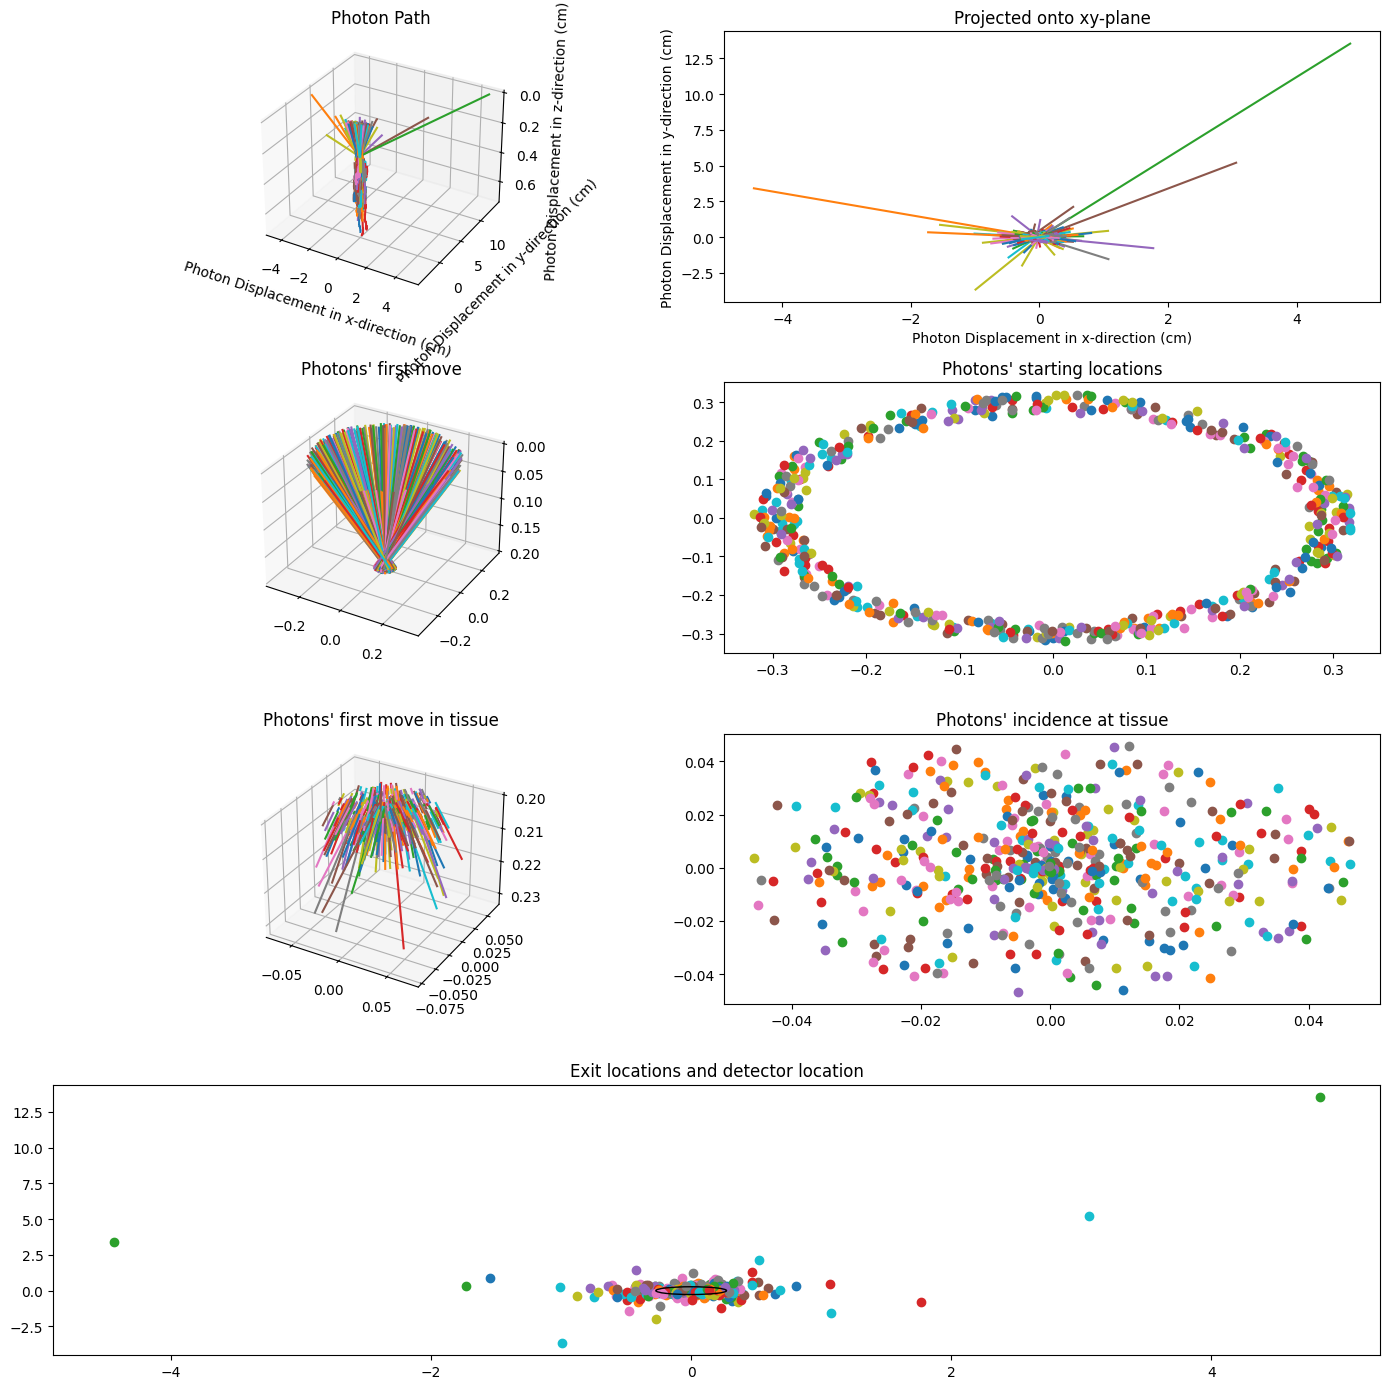

In [15]:
tir = 0
T, R, A = 3 * [0]
fig = plt.figure(figsize=(14, 14))
ax = np.array([
    fig.add_subplot(4, 2, 1, projection='3d'), fig.add_subplot(4, 2, 2), 
    fig.add_subplot(4, 2, 3, projection='3d'), fig.add_subplot(4, 2, 4),
    fig.add_subplot(4, 2, 5, projection='3d'), fig.add_subplot(4, 2, 6),
    fig.add_subplot(4, 1, 4)
])
for i in range(n):
    photon = s.beam(recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    photon.plot_path(axes=ax[0])
    photon.plot_path(project_onto='xy', axes=[ax[1]])
    x,y,z = zip(photon.location_history[0], photon.location_history[1])
    ax[2].plot(x, y, z)
    ax[3].scatter(*photon.location_history[0][:2])
    x,y,z = zip(photon.location_history[1], photon.location_history[2])
    ax[4].plot(x,y,z)
    ax[5].scatter(*photon.location_history[1][:2])
    if photon.exit_location is not None and photon.exit_location[2] == 0:
        x, y, z = photon.exit_location
        ax[6].scatter(x,y)
    
ax[2].set_title("Photons' first move")
ax[2].invert_zaxis()
ax[3].set_title("Photons' starting locations")
ax[4].set_title("Photons' first move in tissue")
ax[4].invert_zaxis()
ax[5].set_title("Photons' incidence at tissue")
detector_circle = patches.Circle((0,0), ID, edgecolor='black', facecolor='none')
ax[6].add_patch(detector_circle)
ax[6].set_title('Exit locations and detector location')
fig.tight_layout()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:.2f}".format(detector.n_detected / n * 100) + '% of photons detected ')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

## Simulation 8

In [30]:
s = mc.System(
    dw, 0.2,
    g, 0.017,
    t, float('inf'),
    surrounding_n=surroundings_n,
    illuminator=LED,
    detector=(detector,0)
)

0 total internal reflectance events.
0.00% of photons transmitted. 
41.91% of photons reflected 
58.11% of photons absorbed 
500 total photons simulated.
145.53 photons rejected by detector aperture.
18.05% of photons detected 
-0.02% overage of photons.


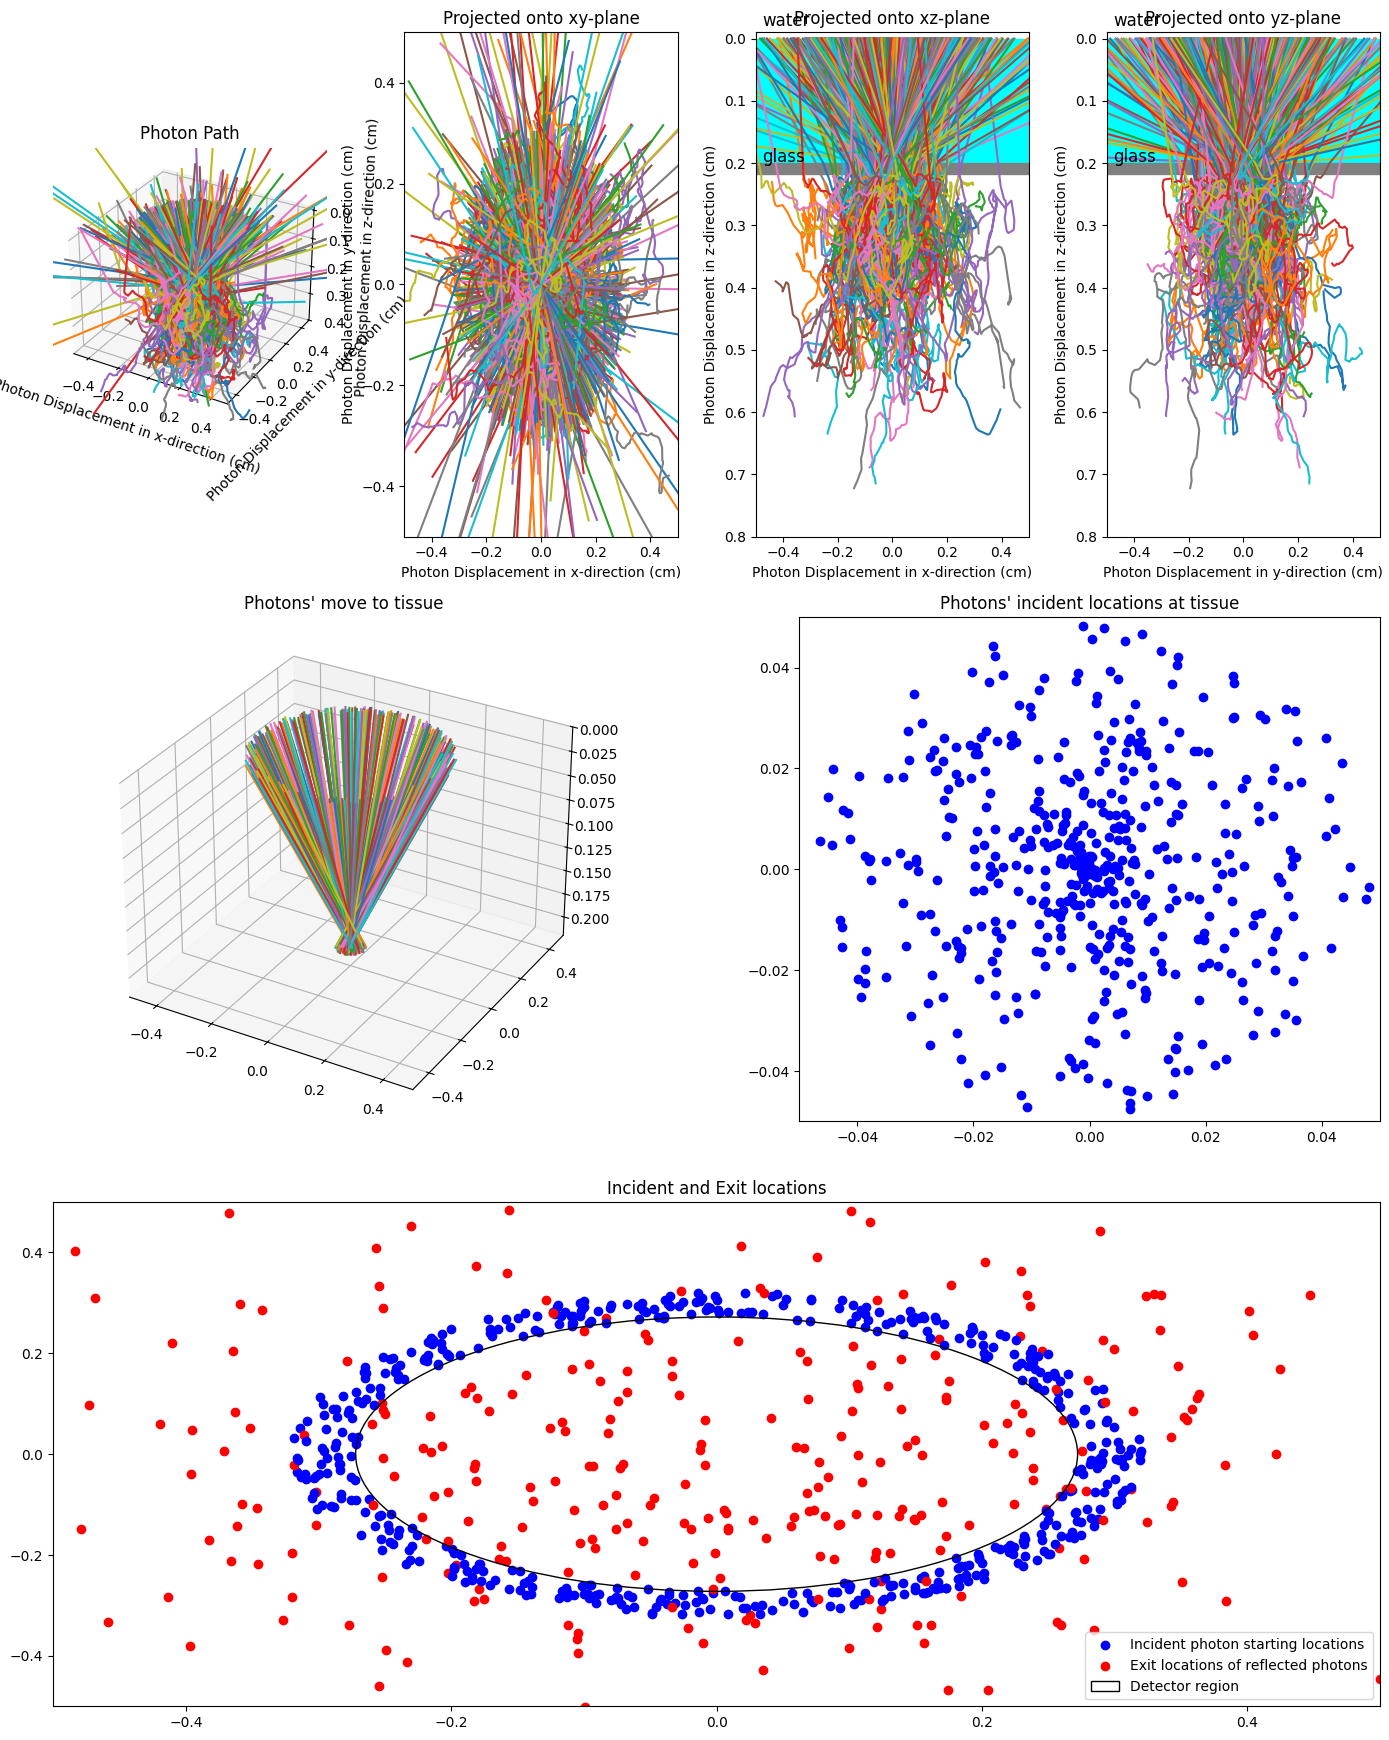

In [32]:
tir = 0
T, R, A = 3 * [0]
detector.reset()
fig = plt.figure(figsize=(14, 17.5))
ax = np.array([
    fig.add_subplot(3, 4, 1, projection='3d'), fig.add_subplot(3, 4, 2), fig.add_subplot(3, 4, 3), fig.add_subplot(3, 4, 4),  # Paths
    fig.add_subplot(3, 2, 3, projection='3d'), fig.add_subplot(3, 2, 4),  # Illumination pattern (beam in water and incidence at tissue)
    fig.add_subplot(3, 1, 3),  # Incidence and detection locations
])
for i in range(n):
    photon = s.beam(recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    photon.plot_path(axes=ax[0])
    photon.plot_path(project_onto='xy', axes=[ax[1]])
    photon.plot_path(project_onto='xz', axes=[ax[2]])
    photon.plot_path(project_onto='yz', axes=[ax[3]])
    x, y, z = zip(photon.location_history[0], photon.location_history[1])
    ax[4].plot(x, y, z)
    ax[6].scatter(*photon.location_history[0][:2], color='b', label='Incident photon starting locations' if i == 0 else '_nolegend_')
    x, y, z = zip(photon.location_history[1], photon.location_history[2])
    ax[5].scatter(*photon.location_history[1][:2], color='b')
    if photon.exit_location is not None and photon.exit_location[2] == 0:
        x, y, z = photon.exit_location
        ax[6].scatter(x, y, color='r', label='Exit locations of reflected photons' if i == 0 else '_nolegend_')

ax[0].set(xlim=[-0.5, 0.5], ylim=[-0.5, 0.5], zlim=[0.4, -0.01])
ax[1].set(xlim=[-0.5, 0.5], ylim=[-0.5, 0.5])
ax[2].set(xlim=[-0.5, 0.5], ylim=[0.8, -0.01])
s.represent_on_axis(ax=ax[2])
ax[3].set(xlim=[-0.5, 0.5], ylim=[0.8, -0.010])
s.represent_on_axis(ax=ax[3])
ax[4].set(xlim=[-0.5, 0.5], ylim=[-0.5, 0.5], zlim=[0, 0.22])
ax[5].set(xlim=[-0.05, 0.05], ylim=[-0.05, 0.05])
ax[6].set(xlim=[-0.5, 0.5], ylim=[-0.5, 0.5])
ax[4].set_title("Photons' move to tissue")
ax[4].invert_zaxis()
ax[5].set_title("Photons' incident locations at tissue")
ax[6].set_title("Photons' incident and detection locations")
detector_circle = patches.Circle((0, 0), ID, edgecolor='black', facecolor='none', label='Detector region')
ax[6].add_patch(detector_circle)
ax[6].set_title('Incident and Exit locations')
ax[6].legend()
fig.tight_layout()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T / n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R / n * 100) + '% of photons reflected ')
print("{:.2f}".format(A / n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T, R, A])) + ' total photons simulated.')
print("{:.2f}".format((R - detector.n_detected)) + ' photons rejected by detector aperture.')
print("{:.2f}".format(detector.n_detected / (n - (R - detector.n_detected))  * 100) + '% of photons detected ')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T, R, A])) / n))

## Simulation 9

In [34]:
s = mc.System(
    dw, 0.2,
    g, 0.017,
    t, 0.1,
    surrounding_n=surroundings_n,
    illuminator=LED,
    detector=(detector, 0)
)

0 total internal reflectance events.
10.24% of photons transmitted. 
41.32% of photons reflected 
48.28% of photons absorbed 
499 total photons simulated.
135.92 photons rejected by detector aperture.
19.41% of photons detected 
0.16% overage of photons.


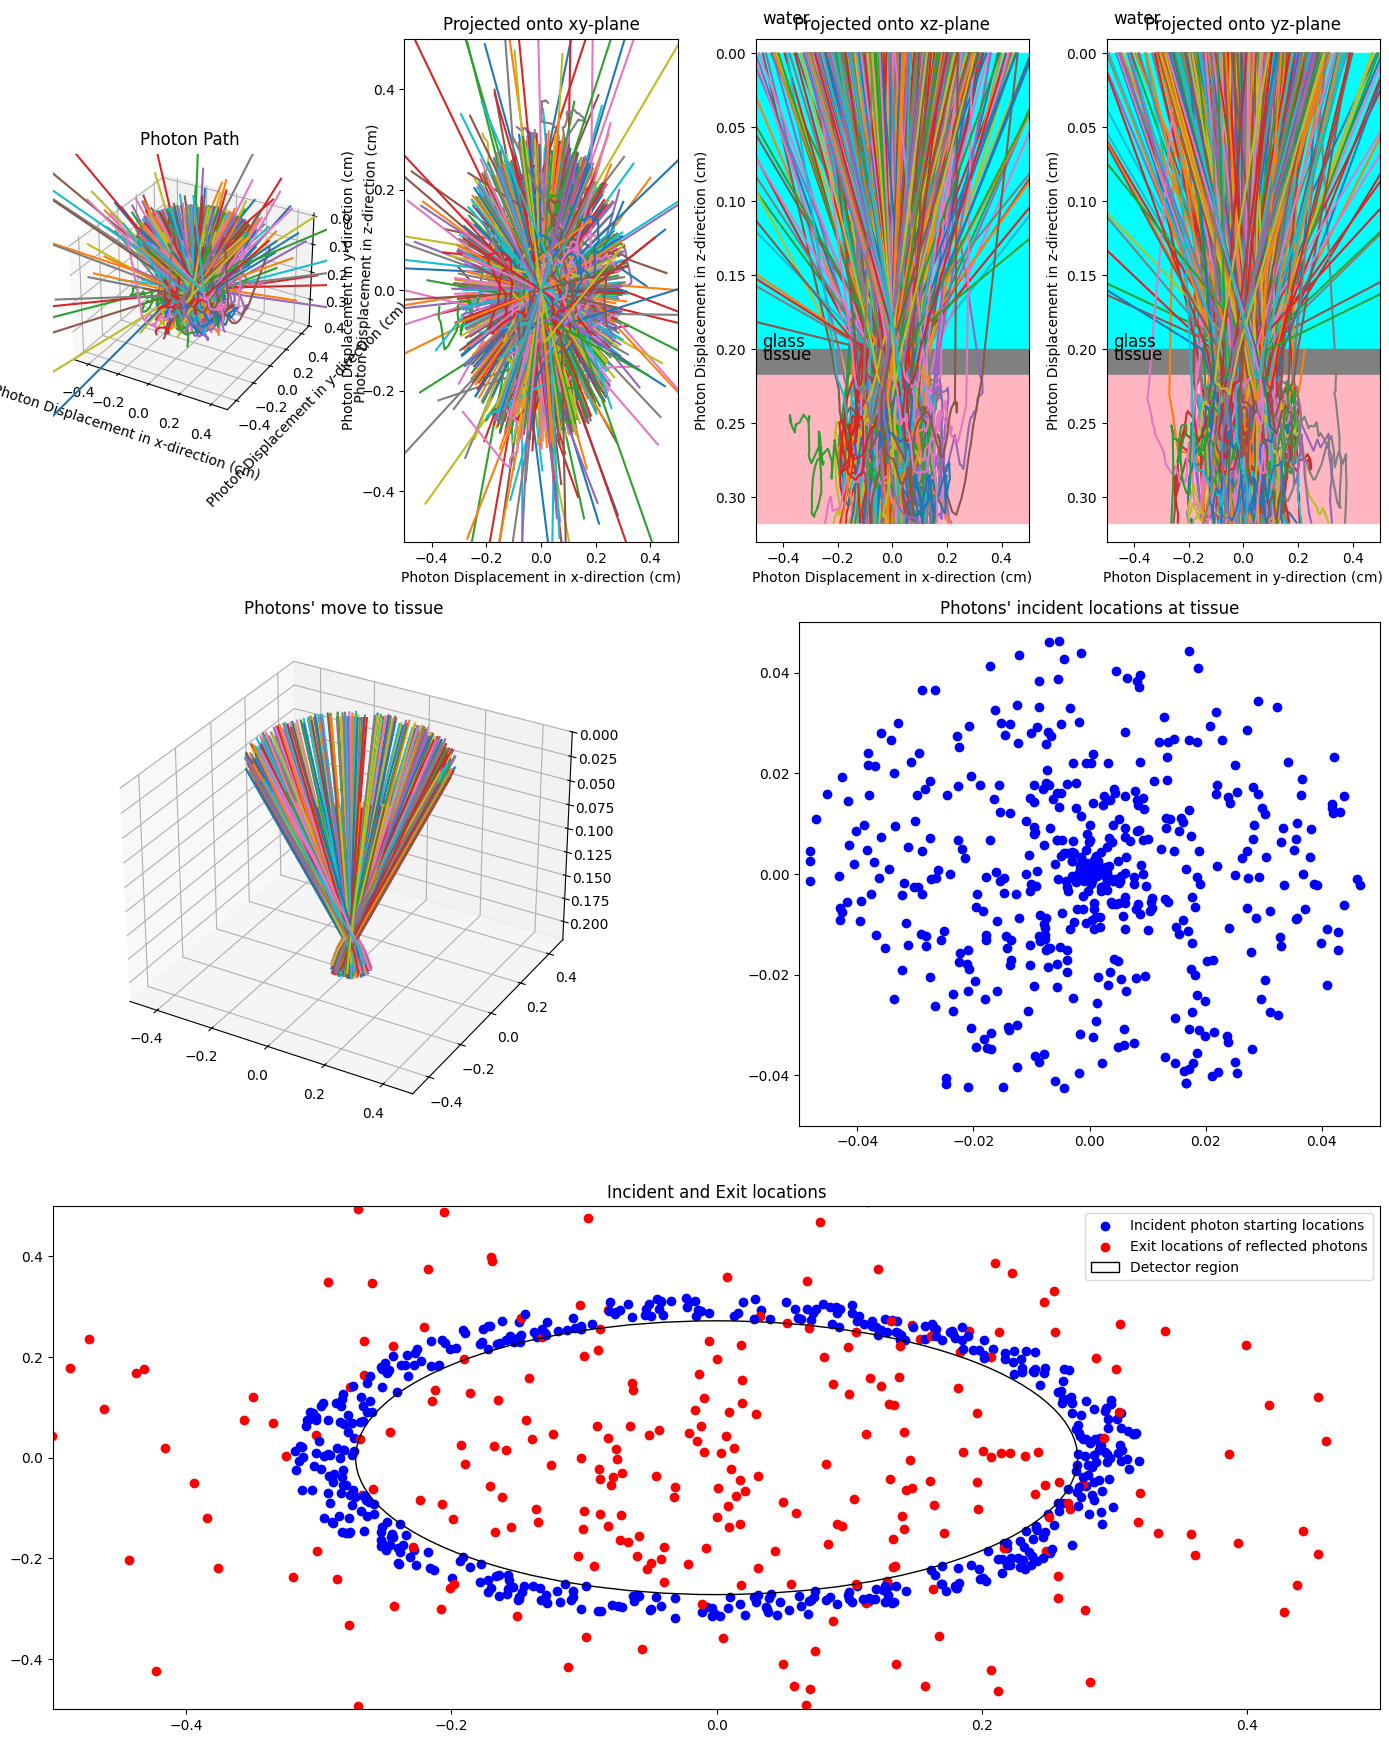

In [35]:
tir = 0
T, R, A = 3 * [0]
detector.reset()
fig = plt.figure(figsize=(14, 17.5))
ax = np.array([
    fig.add_subplot(3, 4, 1, projection='3d'), fig.add_subplot(3, 4, 2), fig.add_subplot(3, 4, 3), fig.add_subplot(3, 4, 4),  # Paths
    fig.add_subplot(3, 2, 3, projection='3d'), fig.add_subplot(3, 2, 4),  # Illumination pattern (beam in water and incidence at tissue)
    fig.add_subplot(3, 1, 3),  # Incidence and detection locations
])
for i in range(n):
    photon = s.beam(recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    photon.plot_path(axes=ax[0], ignore_outside=False)
    photon.plot_path(project_onto='xy', axes=[ax[1]])
    photon.plot_path(project_onto='xz', axes=[ax[2]])
    photon.plot_path(project_onto='yz', axes=[ax[3]])
    x, y, z = zip(photon.location_history[0], photon.location_history[1], photon.location_history[2])
    ax[4].plot(x, y, z)
    ax[6].scatter(*photon.location_history[0][:2], color='b', label='Incident photon starting locations' if i == 0 else '_nolegend_')
    x, y, z = zip(photon.location_history[1], photon.location_history[2])
    ax[5].scatter(*photon.location_history[1][:2], color='b')
    if photon.exit_location is not None and photon.exit_location[2] == 0:
        x, y, z = photon.exit_location
        ax[6].scatter(x, y, color='r', label='Exit locations of reflected photons' if i == 0 else '_nolegend_')


ax[0].set(xlim=[-0.5, 0.5], ylim=[-0.5, 0.5], zlim=[0.4, -0.01])
ax[1].set(xlim=[-0.5, 0.5], ylim=[-0.5, 0.5])
ax[2].set(xlim=[-0.5, 0.5], ylim=[0.33, -0.01])
s.represent_on_axis(ax=ax[2])
ax[3].set(xlim=[-0.5, 0.5], ylim=[0.33, -0.010])
s.represent_on_axis(ax=ax[3])
ax[4].set(xlim=[-0.5, 0.5], ylim=[-0.5, 0.5], zlim=[0, 0.22])
ax[5].set(xlim=[-0.05, 0.05], ylim=[-0.05, 0.05])
ax[6].set(xlim=[-0.5, 0.5], ylim=[-0.5, 0.5])
ax[4].set_title("Photons' move to tissue")
ax[4].invert_zaxis()
ax[5].set_title("Photons' incident locations at tissue")
ax[6].set_title("Photons' incident and detection locations")
detector_circle = patches.Circle((0, 0), ID, edgecolor='black', facecolor='none', label='Detector region')
ax[6].add_patch(detector_circle)
ax[6].set_title('Incident and Exit locations')
ax[6].legend()
fig.tight_layout()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T / n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R / n * 100) + '% of photons reflected ')
print("{:.2f}".format(A / n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T, R, A])) + ' total photons simulated.')
print("{:.2f}".format((R - detector.n_detected)) + ' photons rejected by detector aperture.')
print("{:.2f}".format(detector.n_detected / (n - (R - detector.n_detected))  * 100) + '% of photons detected ')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T, R, A])) / n))